<a href="https://colab.research.google.com/github/VedKate/Vedeneeva_Ekaterina_RT5/blob/main/BMSTU_TMO_2022/%D0%9B%D0%A0/%D0%9B%D0%A02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Кодирование категориальных признаков, заполнение пропусков, масштабирование

Веденеева Е.И. РТ5-61Б

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
# C:\Spring22\DataSets
data = pd.read_csv('Melbourne_housing_FULL.csv', sep=",")

In [ ]:
#размер набора данных
data.shape

(34857, 21)

In [ ]:
# типы колонок
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
#первые строки датасета
data.head(8)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0


In [ ]:
# поиск пропущенных значений
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
print('Всего строк: {}'.format(data.shape[0]))
print('Всего колонок: {}'.format(data.shape[1]))

Всего строк: 34857
Всего колонок: 21


Атрибуты:
* Distance
* Postcode
* CouncilArea
* Regionname
* Propertycount

Имеют небольшое колличество пустых значений. Строки, в которых пропущены эти атрибуты, можно удалить.


In [ ]:
data_del_rows = data.dropna(subset=['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount'])

Также удалим столбцы Landsize, BuildingArea и YearBuilt из-за огромного числа пропусков (Landsize > 30%, BuildingArea и YearBuilt > 50%).

In [ ]:
data_deleted : pd.DataFrame = data_del_rows.drop(columns=['Landsize','BuildingArea', 'YearBuilt'])

Переименуем столбец Bedroom2 в Bedroom.

In [ ]:
data_deleted = data_deleted.rename(columns={'Bedroom2': 'Bedroom'})

In [ ]:
# Проверка пустых значений
data_deleted.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom          8214
Bathroom         8223
Car              8725
CouncilArea         0
Lattitude        7973
Longtitude       7973
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
data.head(8)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0


In [ ]:
#типы колонок
data_deleted.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom          float64
Bathroom         float64
Car              float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
df = data_deleted
df.shape

(34854, 18)

В данном случае заполнение нулями некорректно, так как нулями заполняются в том числе категориальные колонки

Внедрение значений (импьютация)

In [ ]:
for column in df.columns:
    temp_null_count = df[df[column].isnull()].shape[0]
    print(temp_null_count)

0
0
0
0
7610
0
0
0
0
0
8214
8223
8725
0
7973
7973
0
0


In [ ]:
# Обработка числовых колонок с пропущенными значениями
num_cols = []
for column in df.columns:
    temp_null_count = df[df[column].isnull()].shape[0] # подсчет пропущенных в текущей колонке
    dt = str(df[column].dtype) # сохраняем тип данных колонки в виде строки

    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(column) #перебор колонок и вывод
        temp_percent = round((temp_null_count/ data_deleted.shape[0]) * 100.0, 2)
        print('Колонка: {}. Тип данных: {}. Кол-во пустых значений: {}, {}%'.format(column, dt, temp_null_count, temp_percent))

Колонка: Price. Тип данных: float64. Кол-во пустых значений: 7610, 21.83%
Колонка: Bedroom. Тип данных: float64. Кол-во пустых значений: 8214, 23.57%
Колонка: Bathroom. Тип данных: float64. Кол-во пустых значений: 8223, 23.59%
Колонка: Car. Тип данных: float64. Кол-во пустых значений: 8725, 25.03%
Колонка: Lattitude. Тип данных: float64. Кол-во пустых значений: 7973, 22.88%
Колонка: Longtitude. Тип данных: float64. Кол-во пустых значений: 7973, 22.88%


In [ ]:
# Фильтр по колонкам с пропущенными значениями
data_num = df[num_cols]

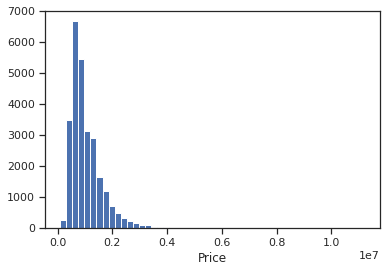

KeyError: ignored

In [ ]:
# Гистограмма по признакам
for column in data_num:
    plt.hist(data[column], 50)
    plt.xlabel(column)
    plt.show()

Смотрим, в чем проблема

In [ ]:
data_num.dtypes

Price         float64
Bedroom       float64
Bathroom      float64
Car           float64
Lattitude     float64
Longtitude    float64
dtype: object

In [ ]:
data_num.head(10)

,Price,Bedroom,Bathroom,Car,Lattitude,Longtitude
0,NaN,2.0,1.0,1.0,-37.8014,144.9958
1,1480000.0,2.0,1.0,1.0,-37.7996,144.9984
2,1035000.0,2.0,1.0,0.0,-37.8079,144.9934
3,NaN,3.0,2.0,1.0,-37.8114,145.0116
4,1465000.0,3.0,2.0,0.0,-37.8093,144.9944
5,850000.0,3.0,2.0,1.0,-37.7969,144.9969
6,1600000.0,3.0,1.0,2.0,-37.8072,144.9941
7,NaN,3.0,2.0,2.0,-37.7965,144.9965
8,NaN,4.0,1.0,2.0,-37.7995,144.9974
9,NaN,3.0,2.0,1.0,-37.7996,144.9989


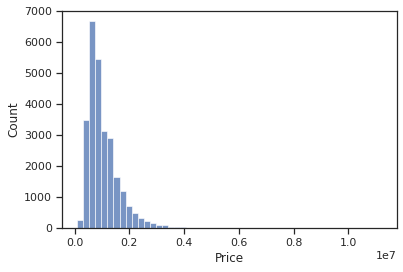

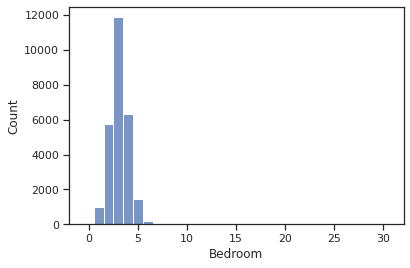

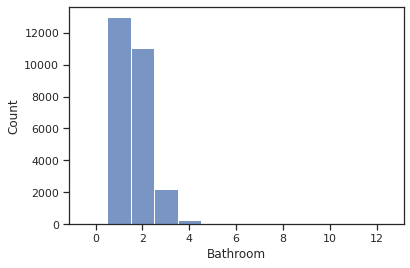

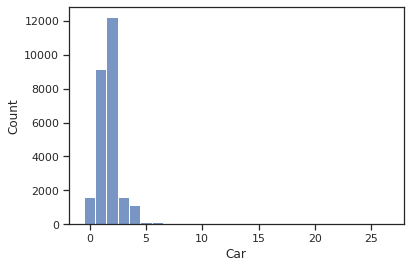

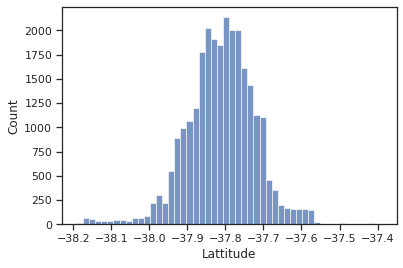

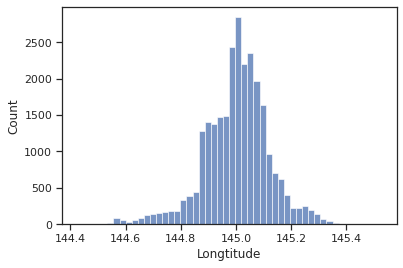

In [ ]:
# Гистограмма по признакам (исправленная)
for column in data_num:
    if column == 'Bedroom' or column == 'Bathroom' or column == 'Car':
        sns.histplot(df[column], discrete=True) # для колонок с целыми числами указыаваем, что они дискретне
    else:
        sns.histplot(df[column], bins = 50)
   # sns.despine() # Remove the top and right spines from plot(s)
    plt.show()

In [ ]:
# Фильтр для проверки заполнения пустых значений
miss_indicator = MissingIndicator()
mask_only_missing_values = miss_indicator.fit_transform(df[['Price']])
mask_only_missing_values


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# Функия для заполнения пропусков в столбце датафрейма
def impute_dataframe(df, col, strategy_name) -> pd.DataFrame:
    # param df: Датафрейм
    # param col: Столбец, в которой надо заполнить пропуски
    # param strategy_name: Стратегия импьютации
    # return: Датафрейм с заполнненой колонкой
  
    imp = SimpleImputer(strategy=strategy_name)

    data_imputed = imp.fit_transform(df[[col]])
    df[[col]] = data_imputed

    return df

In [ ]:
# Заполнение модой
data_completed = impute_dataframe(df, 'Price', 'most_frequent')
data_completed = impute_dataframe(data_completed, 'Lattitude', 'most_frequent')
data_completed = impute_dataframe(data_completed, 'Longtitude', 'most_frequent')

# Заполнение медианой
data_completed = impute_dataframe(data_completed, 'Bedroom', 'median')
data_completed = impute_dataframe(data_completed, 'Bathroom', 'median')
data_completed = impute_dataframe(data_completed, 'Car', 'median')

data_completed.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Колонки Bedroom, Bathroom и Car имеют тип float64, хотя должны иметь тип int64, так отвечают за количество "штучных" объектов. \
Такая же ситуация со колонками Postcode и Propertycount. \
Поле Date тоже нужно привести к соответствующему виду.

In [ ]:
data_completed = data_completed.astype({'Bedroom' : 'int64', 'Bathroom' : 'int64', 'Car' : 'int64', 'Postcode' : 'int64', 'Propertycount' : 'int64'})
data_completed['Date'] = pd.to_datetime(data_completed['Date'], dayfirst=True)
data_completed.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,SS,Jellis,2016-09-03,2.5,3067,2,1,1,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,600000.0,VB,Rounds,2016-02-04,2.5,3067,3,2,1,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,2,1,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,1,2,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,600000.0,SN,Nelson,2016-08-06,2.5,3067,3,2,2,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,600000.0,S,Biggin,2016-08-06,2.5,3067,4,1,2,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019
9,Abbotsford,99 Turner St,2,h,600000.0,S,Collins,2016-08-06,2.5,3067,3,2,1,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019


Кодирование категориальных признаков

Закодируем признак CouncilArea целочисленными значениями (label encoding):

In [ ]:
lbl_enc = LabelEncoder()
ca_lbl_encoded = lbl_enc.fit_transform(data_completed['CouncilArea'])

# Уникальные значения столбца Method
data_completed['CouncilArea'].unique()

# Уникальные значения в закодированном виде
#np.unique(ca_lbl_encoded)


array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)

In [ ]:
# Уникальные значения в закодированном виде
np.unique(ca_lbl_encoded)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [ ]:
# Кодировка столбца
# Копируем датасет, так как при data_lbl_encoded = data_completed label encoding кодирует и оригинальный dataframe
data_le_encoded = data_completed.copy()
data_le_encoded['CouncilArea'] = ca_lbl_encoded

data_le_encoded.head(70)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,600000.0,SS,Jellis,2016-09-03,2.5,3067,2,1,1,31,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,1,1,31,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,1,0,31,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,600000.0,VB,Rounds,2016-02-04,2.5,3067,3,2,1,31,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,2,0,31,-37.8093,144.9944,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Abbotsford,40/80 Trenerry Cr,3,h,927000.0,S,Biggin,2016-07-30,2.5,3067,3,2,2,31,-37.8361,144.9966,Northern Metropolitan,4019
66,Airport West,154 Halsey Rd,3,t,840000.0,PI,Nelson,2016-09-03,13.5,3042,3,2,1,22,-37.7180,144.8780,Western Metropolitan,3464
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-12-03,13.5,3042,3,2,1,22,-37.7203,144.8755,Western Metropolitan,3464
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-03-04,13.5,3042,3,2,1,22,-37.7203,144.8755,Western Metropolitan,3464


Теперь закодируем признак Method наборами бинарных значений (one-hot encoding):

In [ ]:
oh_enc = OneHotEncoder(dtype=np.int64)
meth_oh_encoded = oh_enc.fit_transform(data_le_encoded[['Method']])

In [ ]:
# Размерность закодированного признака
meth_oh_encoded.shape

(34854, 9)

In [ ]:
# Новые названия признаков
oh_enc.get_feature_names_out(['Method'])

array(['Method_PI', 'Method_PN', 'Method_S', 'Method_SA', 'Method_SN',
       'Method_SP', 'Method_SS', 'Method_VB', 'Method_W'], dtype=object)

In [ ]:
data_ohe_encoded: pd.DataFrame = pd.DataFrame.sparse.from_spmatrix(meth_oh_encoded, columns=oh_enc.get_feature_names_out(['Method']))
data_ohe_encoded.head()

,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0


In [ ]:
# Размерность исходного датафрейма
data_le_encoded.shape

(34854, 18)

In [ ]:
# Cоединение датафреймов
data_encoded = data_le_encoded.copy()
data_encoded = pd.concat([data_encoded.reset_index(drop=True), data_ohe_encoded], axis=1)

data_encoded.head() #выглядит довольно громоздко

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Propertycount,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,Abbotsford,68 Studley St,2,600000.0,SS,Jellis,2016-09-03,2.5,3067,2,...,4019,0,0,0,0,0,0,1,0,0
1,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,...,4019,0,0,1,0,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,...,4019,0,0,1,0,0,0,0,0,0
3,Abbotsford,18/659 Victoria St,3,600000.0,VB,Rounds,2016-02-04,2.5,3067,3,...,4019,0,0,0,0,0,0,0,1,0
4,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,...,4019,0,0,0,0,0,1,0,0,0


Повторим кодирование признака Method, но в этот раз с помощью метода get_dummies() из библиотеки Pandas (такой поход позволяет проделать все те е действия проще при не слишком большом количестве уникальных значений кодируемого признака):

In [ ]:
data_encoded_dummies = pd.get_dummies(data_le_encoded, columns=['Method'])
data_encoded_dummies.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom,...,Propertycount,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,Abbotsford,68 Studley St,2,h,600000.0,Jellis,2016-09-03,2.5,3067,2,...,4019,0,0,0,0,0,0,1,0,0
1,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,2016-12-03,2.5,3067,2,...,4019,0,0,1,0,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,2016-02-04,2.5,3067,2,...,4019,0,0,1,0,0,0,0,0,0
3,Abbotsford,18/659 Victoria St,3,u,600000.0,Rounds,2016-02-04,2.5,3067,3,...,4019,0,0,0,0,0,0,0,1,0
4,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,2017-03-04,2.5,3067,3,...,4019,0,0,0,0,0,1,0,0,0


Масштабирование данных про признаку Distance

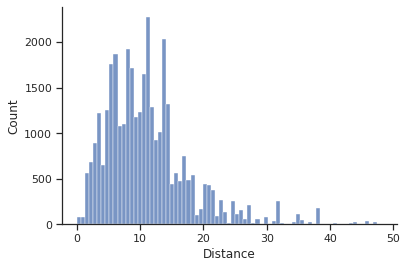

In [ ]:
sns.histplot(data['Distance'], bins= 75)
sns.despine()
plt.show()

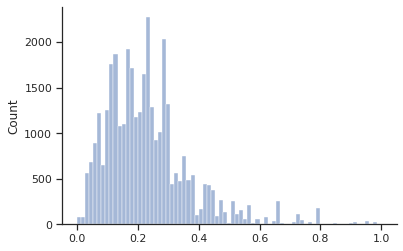

In [ ]:
# MinMax масштабирование
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(data[['Distance']])
# Отмасштабированная гистограмма
sns.histplot(minmax_scaled_data, bins= 75, legend=False)
sns.despine()
plt.show()

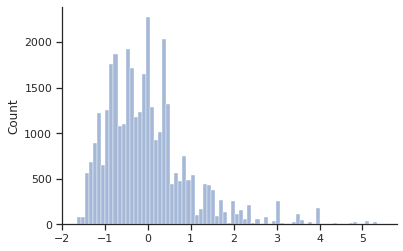

In [ ]:
# Масштабирование  на основе Z-оценки
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data[['Distance']])

# Отмасштабированная гистограмма
sns.histplot(standard_scaled_data, bins= 75, legend=False)
sns.despine()
plt.show()